In [1]:
import networkx as nx
import sys
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

## load data

In [2]:
data_file = 'CEnew' # 'HepPh'
G = nx.read_adjlist(data_file)
G.remove_edges_from(nx.selfloop_edges(G))
nodes = list(nx.nodes(G))
for node in nodes:
    if G.degree(node) == 0:
        G.remove_node(node)

In [3]:
print(nx.number_of_nodes(G), nx.number_of_edges(G))

453 2025


## get initial node sets

In [5]:
max_ = 0.009
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)

degreerank = degree(G, max_topk)
print('done!')
degreerank_non = degree_non(G, max_topk)
print('done!')

# vote = voterank(G, max_topk)
# print('done!')
# vote_non = voterank_non(G, max_topk)
# print('done!')

kshell_rank = kshell(G, max_topk)
print('done!')
kshell_rank_non = kshell_non(G, max_topk)
print('done!')

newmethod_rank = EnRenewRank(G, max_topk, 2)
print('done!')



4
done!
done!
done!
done!
done!


## Different initial infection set sizes

In [6]:
# r is the infection rates
r = [0.0015, 0.003, 0.0045, 0.006, 0.0075, 0.009]
# r = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]
topk_list = []
for k in r:
    topk = round(nx.number_of_nodes(G) * k)
    print(k, topk)
    topk_list.append(topk)
    
infect_prob = compute_probability(G) * 1.5
print(infect_prob)
atio = 1.5
cover_prob = infect_prob / atio
avg = 100
max_iter = 200000

degreerank_result = []
degreerank_non_result = []
vote_result = []
vote_non_result = []
newmethod_result = []
newmethod_non_result = []
kshell_result = []
kshell_non_result = []

for k in tqdm(topk_list):
    topk = k
    degreerank_result.append(get_sir_result(G, degreerank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    degreerank_non_result.append(get_sir_result(G, degreerank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_result.append(get_sir_result(G, vote, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_non_result.append(get_sir_result(G, vote_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_result.append(get_sir_result(G, kshell_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_non_result.append(get_sir_result(G, kshell_rank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_result.append(get_sir_result(G, newmethod_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))

  0%|          | 0/6 [00:00<?, ?it/s]0.0015 1
0.003 1
0.0045 2
0.006 3
0.0075 3
0.009 4
0.03836535182448562
100%|██████████| 6/6 [00:30<00:00,  5.06s/it]


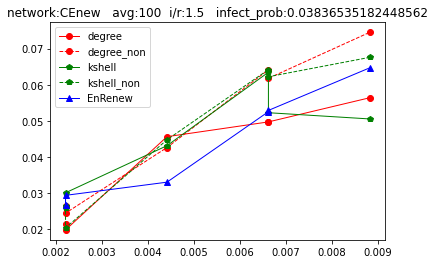

In [9]:
%matplotlib inline
plt.title('network:{}   avg:{}  i/r:{}   infect_prob:{}'.format(data_file, avg, atio, infect_prob))
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degreerank_result, 'r-o', label='degree', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degreerank_non_result, 'r--o', label='degree_non', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), vote_result, 'y-s', label='vote', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), vote_non_result, 'y--s', label='vote_non', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_result, 'g-p', label='kshell', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_non_result, 'g--p', label='kshell_non', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_result, 'b-^', label='EnRenew', linewidth=1.0, )
plt.legend()
plt.show()